<a href="https://colab.research.google.com/github/Konat23/AdministradorVacunas/blob/main/PBA_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os

## Acceder a drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Cargar DataFrames

## Desde AWS

In [ ]:
!pip install boto3
import boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.9/135.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.0 MB/s eta 0:00:00


Importar las claves de acceso:
Se encuentran en el archivo rootkey.csv

In [ ]:
with open('rootkey.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    keys = list(reader)
key_id = keys[1][0]
secret_access_key = keys[1][1]


In [ ]:
#Acceso Rafael
with open('/content/gdrive/MyDrive/EMBED_TABLES/rootkey.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=';', quotechar='|')
    keys = list(reader)
key_id = keys[1][0]
secret_access_key = keys[1][1]

### Acceso a las rutas

In [ ]:
s3 = boto3.client('s3',
                  aws_access_key_id=key_id,
                  aws_secret_access_key=secret_access_key)
response = s3.list_objects_v2(Bucket='embed-dataset-open')
allpaths = []
for content in response.get('Contents', []):
    #print(content.get('Key'))
    allpaths.append(content.get('Key'))
s3.close()

In [ ]:
print(len(allpaths))
print(allpaths[1])

1000
images/cohort_1/10000879/1.2.842.113970.3.62.1.56868341.20180426.1095160/1.2.840.113684.2750825173.1524118967.4848.25046.1/1.2.826.0.1.3680043.8.498.12326784267688742524174894068105129442.dcm


6992096043050201

### Descargar Tablas

In [ ]:


# Nombre del bucket
bucket_name = 'embed-dataset-open'

# Lista para almacenar los objetos
objects = []

# Obtener los primeros 1000 objetos
response = s3.list_objects_v2(Bucket=bucket_name, MaxKeys=1000)

# Agregar los objetos a la lista
objects += response.get('Contents', [])

# Obtener los objetos restantes (si hay)
while response.get('IsTruncated'):
    token = response.get('NextContinuationToken')
    response = s3.list_objects_v2(Bucket=bucket_name, MaxKeys=1000, ContinuationToken=token)
    objects += response.get('Contents', [])

# Mostrar la lista de objetos
#for obj in objects:
#    print(obj.get('Key'))

In [ ]:
serverPaths = ['tables/EMBED_OpenData_clinical.csv',
               'tables/EMBED_OpenData_metadata.csv',
               'tables/EMBED_OpenData_clinical_reduced.csv',
               'tables/EMBED_OpenData_metadata_reduced.csv']

localPaths = ['/content/sample_data/EMBED_OpenData_clinical.csv',
              '/content/sample_data/EMBED_OpenData_metadata.csv',
              '/content/sample_data/EMBED_OpenData_clinical_reduced.csv',
              '/content/sample_data/EMBED_OpenData_metadata_reduced.csv']
for spath, lpath in zip(serverPaths, localPaths):
  s3.download_file('embed-dataset-open',spath,lpath)

In [ ]:
#df_clinical = pd.read_csv('/content/sample_data/EMBED_OpenData_clinical.csv')
#df_metadata = pd.read_csv('/content/sample_data/EMBED_OpenData_metadata.csv')

## Desde Drive

In [ ]:
try:
  #Rafa Load
  df_clinical = pd.read_csv('/content/gdrive/MyDrive/EMBED_TABLES/EMBED_OpenData_clinical.csv')
  df_metadata = pd.read_csv('/content/gdrive/MyDrive/EMBED_TABLES/EMBED_OpenData_metadata.csv')
except:
  #Sebastian Load
  df_clinical_Load = pd.read_csv('/content/gdrive/Othercomputers/Mi PC/Noveno Semestre/TG1/Grade_Project/CPS/Project/Data_Base/Embed/Tables/EMBED_OpenData_clinical.csv')
  df_metadata_Load = pd.read_csv('/content/gdrive/Othercomputers/Mi PC/Noveno Semestre/TG1/Grade_Project/CPS/Project/Data_Base/Embed/Tables/EMBED_OpenData_metadata.csv')


<ipython-input-3-e015be17c68a>:7: DtypeWarning: Columns (28,31,33,48,49,53,54,55,56,57,59,81,84,85,93,111) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clinical_Load = pd.read_csv('/content/gdrive/Othercomputers/Mi PC/Noveno Semestre/TG1/Grade_Project/CPS/Project/Data_Base/Embed/Tables/EMBED_OpenData_clinical.csv')
<ipython-input-3-e015be17c68a>:8: DtypeWarning: Columns (115,116,117,118,119,120,130,132,133,134,135,136,138,143,147,148,149) have mixed types. Specify dtype option on import or set low_memory=False.
  df_metadata_Load = pd.read_csv('/content/gdrive/Othercomputers/Mi PC/Noveno Semestre/TG1/Grade_Project/CPS/Project/Data_Base/Embed/Tables/EMBED_OpenData_metadata.csv')


In [ ]:
df_clinical = df_clinical_Load
df_metadata = df_metadata_Load

# Filtrado de Columnas

Imprimir columnas de cada DF

In [ ]:
print('---------CLINICAL DATA---------')
for column in df_clinical.columns.values:
  print(column)

print('---------METADADA---------')
for column in df_metadata.columns.values:
  print(column)


---------CLINICAL DATA---------
Unnamed: 0
massshape
massmargin
massdens
calcfind
calcdistri
calcnumber
otherfind
implanfind
consistent
side
size
location
depth
distance
numfind
asses
recc
stable
new
changed
loc_num
tech_init
init
proccode
desc
vtype
tissueden
case
type
technique
biopsite
biop_loc
bcomp
path_loc
diag_out
surgery
lymphsurg
surg_loc
pocomp
ltcomp
bside
path1
path2
path3
path4
path5
path6
path7
path8
path9
path10
concord
hgrade
tnmpt
tnmpn
tnmm
tnmdesc
tnmr
stage
loc
bdepth
bdistance
focality
nfocal
specsize
specsize2
specsize3
dcissize
invsize
superior
inferior
anterior
posterior
medial
lateral
specinteg
specnum
specembed
est
estp
her2
fish
ki67
extracap
methodevl
snode_rem
node_rem
node_pos
macrometa
micrometa
isocell
largedp
eic
GENDER_DESC
ETHNICITY_DESC
ETHNIC_GROUP_DESC
MARITAL_STATUS_DESC
ENCOUNTER_QTY
age_at_study
empi_anon
acc_anon
study_date_anon
sdate_anon
procdate_anon
pdate_anon
cohort_num
path_group
path_severity
total_L_find
total_R_find
first_3_zip
-------

In [ ]:
# Solo dejar informacion que me interesa:
df_clinical = df_clinical[['empi_anon','acc_anon','age_at_study','asses','tissueden','ETHNICITY_DESC','bside','side']]
df_metadata = df_metadata[['empi_anon','acc_anon','Manufacturer','ManufacturerModelName','anon_dicom_path']]

# Analisis y Visualizacion de DataFrames

In [ ]:
print("Id examenes totales en clinical", df_clinical['acc_anon'].count())
print("Id examenes totales en metadata", df_metadata['acc_anon'].count())
print("Id examenes unicos en clinical", df_clinical['acc_anon'].nunique())
print("Id examenes unicos en metadata", df_metadata['acc_anon'].nunique())
print("Id pacientes unicos en clinical", df_clinical['empi_anon'].nunique())
print("Id pacientes unicos en metadata", df_clinical['empi_anon'].nunique())


Id examenes totales en clinical 81776
Id examenes totales en metadata 480323
Id examenes unicos en clinical 72770
Id examenes unicos en metadata 72770
Id pacientes unicos en clinical 23253
Id pacientes unicos en metadata 23253


**Extender tabla metadata para análisis de exámenes por fabricante**

In [ ]:
#Extender metadata
df_clinical_unique = df_clinical.drop_duplicates(subset=['acc_anon'], keep='first')
df_metadata_expanded = pd.merge(df_metadata, df_clinical_unique[['acc_anon', 'age_at_study','asses','tissueden','ETHNICITY_DESC','bside','side']], on='acc_anon')

print("Expanded shape: ", df_metadata_expanded.shape)
print("Metadata shape ",df_metadata.shape)

Expanded shape:  (480323, 11)
Metadata shape  (480323, 5)


## Informacion conteo de Manufacturer

### Por Imagenes:

In [ ]:
df_metadata['ManufacturerModelName'].value_counts(normalize=False)

Selenia Dimensions                        427782
Senograph 2000D ADS_17.4.5                 14226
Senographe Essential VERSION ADS_53.40     14148
Lorad Selenia                              13431
Clearview CSm                               8239
Senograph 2000D ADS_17.5                    1939
Senographe Pristina                          524
Senographe Essential VERSION ADS_54.10        31
DSM                                            3
Name: ManufacturerModelName, dtype: int64

In [ ]:
df_metadata['Manufacturer'].value_counts(normalize=False)

HOLOGIC, Inc.               441213
GE MEDICAL SYSTEMS           30344
FUJIFILM Corporation          8239
GE HEALTHCARE                  524
Lorad, A Hologic Company         3
Name: Manufacturer, dtype: int64

### Por examenes:

In [ ]:
# Por Examenes
nuevo_df = df_metadata.drop_duplicates(subset=['acc_anon'], keep='last')
# Filtrado para dejar uno por examen
nuevo_df['Manufacturer'].value_counts(normalize=False)

HOLOGIC, Inc.               64624
GE MEDICAL SYSTEMS           6243
FUJIFILM Corporation         1791
GE HEALTHCARE                 111
Lorad, A Hologic Company        1
Name: Manufacturer, dtype: int64

### Por Paciente

Definir sistema puede no ser adecuado, ya que cada paciente pudo haber pasado
por diferentes sistemas, en este caso solo contamos el primer sistema que uso
el paciente, si se usa el ultimo dara resultados diferentes. Un ejemplo de este
prblema esta en esta [seccion](#scrollTo=wOetlIhY5XBt). Donde se ve que la persona que uso el sistema Lora, uso otros sistemas antes y despues, con lo que no es contado en el conteo de sistemas por paciente,

In [ ]:
# Por Paciente
nuevo_df = df_metadata.drop_duplicates(subset=['empi_anon'], keep='first')
"""
Nota:
Definir sistema puede no ser adecuado, ya que cada paciente pudo haber pasado
por diferentes sistemas, en este caso solo contamos el primer sistema que uso
el paciente, si se usa el ultimo dara resultados diferentes. Un ejemplo de este
prblema esta en la seccion
"""
nuevo_df['Manufacturer'].value_counts(normalize=False)

HOLOGIC, Inc.           18898
GE MEDICAL SYSTEMS       3332
FUJIFILM Corporation      983
GE HEALTHCARE              43
Name: Manufacturer, dtype: int64

## Informacion Quartiles Edades

### Por Examenes

#### General

In [ ]:
df_age=df_clinical_unique[['age_at_study']]
df_age.describe()

,age_at_study
count,72571.000000
mean,58.860523
std,11.965366
min,19.315934
25%,49.382260
50%,58.582996
75%,67.889142
max,89.000000


#### Hologic

In [ ]:
fabricante1='HOLOGIC, Inc.'
fabricante2='Lorad, A Hologic Company'
#Tabla con examenes de HO
nuevo_df = df_metadata_expanded.drop_duplicates(subset=['acc_anon'], keep='last')
pacientes_HO=nuevo_df.loc[nuevo_df.Manufacturer.isin([fabricante1,fabricante2])]
print("Con NaN de ", pacientes_HO['age_at_study'].isna().sum())
pacientes_HO.describe()


Con NaN de  171


,empi_anon,acc_anon,age_at_study,tissueden
count,6.462500e+04,6.462500e+04,64454.000000,64208.000000
mean,5.515993e+07,5.489670e+15,59.153540,2.439821
std,2.604217e+07,2.596677e+15,11.970949,0.759523
min,1.000088e+07,1.000032e+15,19.315934,1.000000
25%,3.266236e+07,3.239958e+15,49.658104,2.000000
50%,5.528108e+07,5.480241e+15,59.032013,2.000000
75%,7.760993e+07,7.749358e+15,68.236856,3.000000
max,9.999956e+07,9.999903e+15,89.000000,5.000000


4         43.428681
13        65.227897
19        59.686373
31        44.441707
51        56.496711
            ...    
480292    77.992019
480305    66.268301
480315    76.056319
480319    69.266309
480322    45.345216
Name: age_at_study, Length: 64625, dtype: float64


#### General Electric

In [ ]:
fabricante1 = 'GE MEDICAL SYSTEMS'
fabricante2 = 'GE HEALTHCARE'
nuevo_df = df_metadata_expanded.drop_duplicates(subset=['acc_anon'], keep='last')
pacientes_GE=nuevo_df.loc[nuevo_df.Manufacturer.isin([fabricante1,fabricante2])]
print("Con NaN de ", pacientes_GE['age_at_study'].isna().sum())
pacientes_GE.describe()

Con NaN de  17


,empi_anon,acc_anon,age_at_study,tissueden
count,6.354000e+03,6.354000e+03,6337.000000,6321.000000
mean,5.518139e+07,5.466147e+15,57.645952,2.464800
std,2.628146e+07,2.610278e+15,11.932319,0.663279
min,1.001905e+07,1.001010e+15,25.194220,1.000000
25%,3.188087e+07,3.194617e+15,48.302155,2.000000
50%,5.531906e+07,5.494607e+15,56.713006,2.000000
75%,7.821980e+07,7.735179e+15,66.287467,3.000000
max,9.990862e+07,9.999075e+15,89.000000,5.000000


#### FUJIFILM Corporation

In [ ]:
fabricante1 = 'FUJIFILM Corporation'
nuevo_df = df_metadata_expanded.drop_duplicates(subset=['acc_anon'], keep='last')
pacientes_FF=nuevo_df.loc[nuevo_df.Manufacturer.isin([fabricante1])]
print("Con NaN de ", pacientes_FF['age_at_study'].isna().sum())
pacientes_FF.describe()

Con NaN de  11


,empi_anon,acc_anon,age_at_study,tissueden
count,1.791000e+03,1.791000e+03,1780.000000,1790.000000
mean,5.516763e+07,5.521574e+15,52.574321,2.444134
std,2.581969e+07,2.577470e+15,9.664277,0.706875
min,1.001905e+07,1.000954e+15,30.442788,1.000000
25%,3.252368e+07,3.282931e+15,45.232277,2.000000
50%,5.504383e+07,5.495173e+15,51.613654,2.000000
75%,7.760062e+07,7.769586e+15,58.481009,3.000000
max,9.998077e+07,9.992474e+15,89.000000,4.000000


#### Histograma

In [ ]:
plt.hist(df_age[['age_at_study']], bins=20)
plt.xlabel('Edad (age_at_study)')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de edades por examen')
plt.show()

NameError: ignored

In [ ]:
#pacientes_HO['age_at_study']
#pacientes_GE
#pacientes_FF
#df_age.boxplot(column=,by)
#df_metadata_expanded.boxplot(column='age_at_study',by='Manufacturer')
#-----------------------------


age_df = pd.DataFrame({
    'Hologic': pacientes_HO['age_at_study'].values,
    'General Electric': pacientes_GE['age_at_study'].values,
    'Fujifilm': pacientes_FF['age_at_study'].values
})
#age_df.head(10)
print(age_df.values)
#plt.boxplot(age_df.values, labels=age_df.columns)
#plt.show()

ValueError: ignored

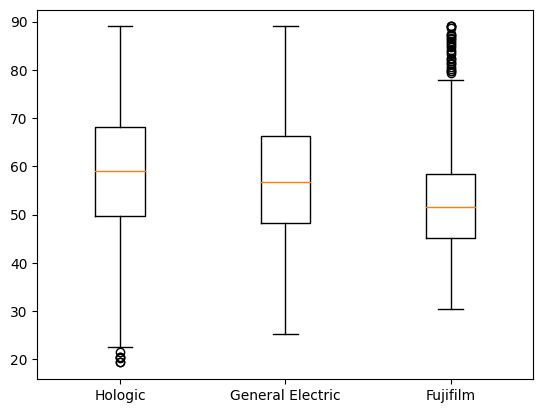

In [ ]:

# Datos de ejemplo para cada grupo
grupo1 = pacientes_HO['age_at_study'].dropna().values
grupo2 = pacientes_GE['age_at_study'].dropna().values
grupo3 = pacientes_FF['age_at_study'].dropna().values

# Lista de datos para los tres grupos
datos = [grupo1, grupo2, grupo3]

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear el diagrama de cajas
ax.boxplot(datos)

# Etiquetas de los grupos
etiquetas = ['Hologic', 'General Electric', 'Fujifilm']
ax.set_xticklabels(etiquetas)

# Mostrar la gráfica
plt.show()


### Por imagen

#### General

In [ ]:
df_age_image=df_metadata_expanded[['age_at_study']]
print("Con NaN de ", df_metadata_expanded['age_at_study'].isna().sum())
df_age_image.describe()

Con NaN de  1327


,age_at_study
count,478996.000000
mean,58.848209
std,12.006766
min,19.315934
25%,49.356250
50%,58.645968
75%,67.941162
max,89.000000


#### HOLOGIC

In [ ]:
fabricante1='HOLOGIC, Inc.'
fabricante2='Lorad, A Hologic Company'
pacientes_HO_image_edad=df_metadata_expanded.loc[df_metadata_expanded.Manufacturer.isin([fabricante1,fabricante2])]
print("Con NaN de ", pacientes_HO_image_edad['age_at_study'].isna().sum())
pacientes_HO_image_edad[['age_at_study']].describe()

Con NaN de  1199


,age_at_study
count,440017.000000
mean,59.060350
std,12.012206
min,19.315934
25%,49.553379
50%,58.971779
75%,68.193050
max,89.000000


#### GE

In [ ]:
fabricante1 = 'GE MEDICAL SYSTEMS'
fabricante2 = 'GE HEALTHCARE'
pacientes_GE_image_edad=df_metadata_expanded.loc[df_metadata_expanded.Manufacturer.isin([fabricante1,fabricante2])]
print("Con NaN de ", pacientes_GE_image_edad['age_at_study'].isna().sum())
pacientes_GE_image_edad[['age_at_study']].describe()

Con NaN de  83


,age_at_study
count,30785.000000
mean,57.491615
std,11.955734
min,25.194220
25%,48.184425
50%,56.573372
75%,66.183426
max,89.000000


#### FUJIFILM

In [ ]:
fabricante1 = 'FUJIFILM Corporation'
pacientes_FF_image_edad=df_metadata_expanded.loc[df_metadata_expanded.Manufacturer.isin([fabricante1])]
print("Con NaN de ", pacientes_FF_image_edad['age_at_study'].isna().sum())
pacientes_FF_image_edad[['age_at_study']].describe()

Con NaN de  45


,age_at_study
count,8194.000000
mean,52.553048
std,9.633738
min,30.442788
25%,45.276768
50%,51.601333
75%,58.332478
max,89.000000


#### Histograma


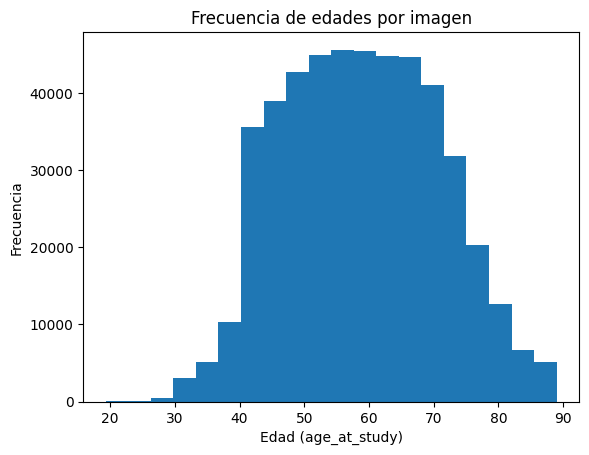

In [ ]:
plt.hist(df_age_image[['age_at_study']], bins=20)
plt.xlabel('Edad (age_at_study)')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de edades por imagen')
plt.show()

### Por Paciente

In [ ]:
# Estadisticas por Paciente
nuevo_df = df_clinical.drop_duplicates(subset=['empi_anon'], keep='last')
nuevo_df[['age_at_study']].describe()

,age_at_study
count,23179.000000
mean,57.454001
std,12.760102
min,19.315934
25%,47.475308
50%,56.630869
75%,66.819989
max,89.000000


In [ ]:
nuevo_df = df_clinical.drop_duplicates(subset=['empi_anon'], keep='first')
nuevo_df[['age_at_study']].describe()

,age_at_study
count,23179.000000
mean,55.233140
std,12.171289
min,19.315934
25%,45.371226
50%,54.229724
75%,64.146423
max,89.000000


**GE**

In [ ]:
pd.options.display.max_columns = None
#metadata_GE.head(20)
#print(Id_GE)
#clinical_GE.head(10)
#clinical_GE[['age_at_study']].describe()


NameError: ignored

**FUJIFILM**

## Información clasificación BIRADS lesiones

### Por examenes

#### General


In [ ]:
df_asses=df_metadata_expanded.drop_duplicates(subset=['acc_anon'], keep='last')[['asses']]
df_asses.value_counts(normalize=False)

asses
N        45230
B        12076
A         8962
P         4310
S         1755
K          281
M          148
X            8
dtype: int64

#### HOLOGIC

In [ ]:
fabricante1='HOLOGIC, Inc.'
fabricante2='Lorad, A Hologic Company'
#Tabla con examenes de HO
nuevo_df = df_metadata_expanded.drop_duplicates(subset=['acc_anon'], keep='last')
pacientes_HO=nuevo_df.loc[nuevo_df.Manufacturer.isin([fabricante1,fabricante2])]
pacientes_HO[['asses']].value_counts(normalize=False)

asses
N        40519
B        10184
A         7863
P         4009
S         1644
K          278
M          121
X            7
dtype: int64

#### GE

In [ ]:
fabricante1 = 'GE MEDICAL SYSTEMS'
fabricante2 = 'GE HEALTHCARE'
nuevo_df = df_metadata_expanded.drop_duplicates(subset=['acc_anon'], keep='last')
pacientes_GE=nuevo_df.loc[nuevo_df.Manufacturer.isin([fabricante1,fabricante2])]
pacientes_GE[['asses']].value_counts(normalize=False)

asses
N        3444
B        1742
A         725
P         301
S         111
M          27
K           3
X           1
dtype: int64

#### Fujifilm

In [ ]:
fabricante1 = 'FUJIFILM Corporation'
nuevo_df = df_metadata_expanded.drop_duplicates(subset=['acc_anon'], keep='last')
pacientes_FF=nuevo_df.loc[nuevo_df.Manufacturer.isin([fabricante1])]
pacientes_FF[['asses']].value_counts(normalize=False)

asses
N        1267
A         374
B         150
dtype: int64

### Por Imágenes

#### General

In [ ]:
df_asses_image=df_metadata_expanded[['asses']]
df_asses_image.value_counts(normalize=False)

asses
N        306956
B         75223
A         60608
P         24745
S         10309
K          1379
M          1045
X            58
dtype: int64

#### HOLOGIC

In [ ]:
fabricante1='HOLOGIC, Inc.'
fabricante2='Lorad, A Hologic Company'
pacientes_HO_image=df_metadata_expanded.loc[df_metadata_expanded.Manufacturer.isin([fabricante1,fabricante2])]
pacientes_HO_image[['asses']].value_counts(normalize=False)

asses
N        284177
B         66270
A         55361
P         23338
S          9755
K          1371
M           890
X            54
dtype: int64

#### GE

In [ ]:
fabricante1 = 'GE MEDICAL SYSTEMS'
fabricante2 = 'GE HEALTHCARE'
pacientes_GE_image=df_metadata_expanded.loc[df_metadata_expanded.Manufacturer.isin([fabricante1,fabricante2])]
pacientes_GE_image[['asses']].value_counts(normalize=False)

asses
N        16951
B         8252
A         3537
P         1407
S          554
M          155
K            8
X            4
dtype: int64

#### FUJIFILM

In [ ]:
fabricante1 = 'FUJIFILM Corporation'
pacientes_FF_image=df_metadata_expanded.loc[df_metadata_expanded.Manufacturer.isin([fabricante1])]
pacientes_FF_image[['asses']].value_counts(normalize=False)

asses
N        5828
A        1710
B         701
dtype: int64

## Filtrado por K/M y N

En esta seccion se buscara encontrar los pacientes que en algun momento fueron clasificados como N y eventualmente fueron clasificados como K o M

In [ ]:
df_km =df_metadata_expanded.loc[df_metadata_expanded.asses.isin(['K','M'])]
empi_anon_km_list = df_km['empi_anon'].values.tolist()
df_empi_anon_km = df_metadata_expanded.loc[df_metadata_expanded['empi_anon'].isin(empi_anon_km_list)]
print("Total pacientes clasificados en K/M: ", df_km['empi_anon'].nunique())
#empi_anon_k.head(60)
df_k_N = df_empi_anon_km.loc[df_empi_anon_km.asses.isin(['N'])]
print("Total pacientes clasificados en K/M y N: ", df_k_N['empi_anon'].nunique())

Total pacientes clasificados en K/M:  318
Total pacientes clasificados en K/M y N:  77


43 son los pacientes Con clasificacion N  y K en diferentes examenes.

# Subset de 120 examenes

## 30 exámenes Ge KM (fijos)

Identificacion de los 30 pacientes con GE que tienen clasificado algun examen como K y M.

In [ ]:
df_M_K_GE = df_metadata_expanded.loc[df_metadata_expanded.asses.isin(['K','M']) & df_metadata_expanded.Manufacturer.isin(['GE HEALTHCARE','GE MEDICAL SYSTEMS'])]
df_M_K_GE = df_M_K_GE.drop_duplicates(subset=['acc_anon'])

list__M_K_GE = df_M_K_GE['empi_anon'].values.tolist()

# Hacer una lista con las id de examen seleccionados por semejanza
list_acc_M_K_GE  = df_M_K_GE['acc_anon'].values.tolist()
df_M_K_GE.head(30)




,empi_anon,acc_anon,Manufacturer,ManufacturerModelName,anon_dicom_path,age_at_study,asses,tissueden,ETHNICITY_DESC
2632,59567863,4169145865636417,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/59567863/1...,51.267309,M,4.0,African American or Black
45643,63456414,2939308266246184,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_1/63456414/1...,48.863426,M,2.0,African American or Black
62436,67089718,7818430406068104,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_1/67089718/1...,71.588055,M,3.0,Caucasian or White
75983,15941991,7027122798387630,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/15941991/1...,53.572626,K,2.0,African American or Black
82476,21829886,9000955582871023,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_1/21829886/1...,58.697988,M,3.0,Caucasian or White
87471,58689088,1737115297213414,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_1/58689088/1...,67.637255,M,2.0,Caucasian or White
89423,76386131,5917344765676752,GE HEALTHCARE,Senographe Pristina,/mnt/NAS2/mammo/anon_dicom/cohort_1/76386131/1...,63.508491,M,3.0,Caucasian or White
109297,33814754,4469045031994786,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/33814754/1...,64.611867,M,2.0,African American or Black
114951,62912323,8098993003889502,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_1/62912323/1...,58.785601,M,3.0,African American or Black
167381,25160991,3125787726221325,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/25160991/1...,47.475308,M,3.0,Caucasian or White


## 30 exámenes Hologic KM (elegir)

IMPORTANTE: Por la forma sobreescrita en que se construyeron estas listas, es importante correr toda la seccion "30 exámenes Hologic KM (elegir)" de forma lineal, de lo contrario esta suceptible a errores

Buscaremos primero personas con examenes en Hologic y Genereal electric con KM

In [ ]:
# Encontrar pareados entre sistemas para KM
df_candidatos = df_metadata_expanded[df_metadata_expanded['empi_anon'].isin(list__M_K_GE)]

#df_candidatos = df_metadata_expanded

df_M_K_HO = df_candidatos.loc[df_candidatos.asses.isin(['K','M']) & df_candidatos.Manufacturer.isin(['HOLOGIC, Inc.','Lorad, A Hologic Company'])]
df_M_K_HO = df_M_K_HO.drop_duplicates(subset=['acc_anon'])
#df_M_K_HO2 = df_M_K_HO.rename(columns={'empi_anon':'empi_anon2'})

merged = pd.merge(df_M_K_GE, df_M_K_HO[['empi_anon','acc_anon','asses' ]], how ='left', on = ['empi_anon'])
df_M_K_HO=merged[merged['asses_y'].notna()]
df_M_K_HO = df_M_K_HO.drop_duplicates(subset=['empi_anon'])
#
# Lista de pacientes MK Ho con pareja perfecta
list__M_K_HO_par = df_M_K_HO['empi_anon'].values.tolist()

# Lista de pacientes MK GE con pareja perfecta
list__M_K_GE_par = list__M_K_HO_par # Son ellos mismos!


df_M_K_HO.head(5)
#merged.info()

,empi_anon,acc_anon_x,Manufacturer,ManufacturerModelName,anon_dicom_path,age_at_study,asses_x,tissueden,ETHNICITY_DESC,acc_anon_y,asses_y
6,76386131,5917344765676752,GE HEALTHCARE,Senographe Pristina,/mnt/NAS2/mammo/anon_dicom/cohort_1/76386131/1...,63.508491,M,3.0,Caucasian or White,5.341856e+15,M
18,75792567,6848187112981910,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.5,/mnt/NAS2/mammo/anon_dicom/cohort_2/75792567/1...,58.207903,M,2.0,African American or Black,8.817515e+15,K
22,85936969,4786838232916669,GE HEALTHCARE,Senographe Pristina,/mnt/NAS2/mammo/anon_dicom/cohort_2/85936969/1...,78.629951,K,3.0,Asian,5.189803e+15,M


In [ ]:
# Paso 1: Quitar todos los usuario que ya se han usado para la categoria KM en GE
df_candidatos = df_metadata_expanded[~df_metadata_expanded['empi_anon'].isin(list__M_K_GE)]

# Paso 2: Filtrar por categoria KM y Hologic
df_candidatos = df_candidatos.loc[df_candidatos.asses.isin(['K','M']) & df_candidatos.Manufacturer.isin(['HOLOGIC, Inc.','Lorad, A Hologic Company'])]
df_candidatos = df_candidatos.drop_duplicates(subset=['acc_anon'])
df_candidatos.info()

# Paso 2.5: Quitar pareados perfectos con KM General electric
df_M_K_GE_no_par = df_M_K_GE[~df_M_K_GE['empi_anon'].isin(list__M_K_HO_par)]

# Paso 3: Hacer merge con las caracteristicas clinicas impuestas por el grupo General Electric KM
merged = pd.merge(df_M_K_GE_no_par, df_candidatos[['empi_anon','asses','tissueden','ETHNICITY_DESC','age_at_study','acc_anon']], how ='left', on = ['asses','tissueden','ETHNICITY_DESC'])


# Paso 4: Calcular la diferencia de edad para cada sujeto del conjunto A
merged['dff_age'] = abs(merged['age_at_study_x'] - merged['age_at_study_y'])

# Paso 5: Seleccionar los sujetos del conjunto con la menor diferencia de edad
indices_min_dif_edad = merged.groupby('empi_anon_x')['dff_age'].idxmin()
indices_min_dif_edad = indices_min_dif_edad.dropna()
filtred = merged.loc[indices_min_dif_edad.values]
# PAso 5.1: Si encontro dos de GE la misma pareja, quitar.
filtred = filtred.drop_duplicates(subset=['empi_anon_y'])

# Paso 6: Hacer una lista con las id de examen seleccionados por semejanza y por pareados
list_acc_M_K_HO = filtred['acc_anon_y'].values.tolist() + df_M_K_HO['acc_anon_y'].values.tolist()

#print(len(set(list_acc_M_K_HO)))

# Lista de pacientes de MK HO que se les selecciono una examenes
list__M_K_HO = filtred['empi_anon_y'].values.tolist() + list__M_K_HO_par

# Lista de pacientes de MK GE que se les selecciono una examenes con  HO
list__M_K_GE = filtred['empi_anon_x'].values.tolist() + list__M_K_HO_par


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 148 to 480159
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empi_anon              394 non-null    int64  
 1   acc_anon               394 non-null    int64  
 2   Manufacturer           394 non-null    object 
 3   ManufacturerModelName  394 non-null    object 
 4   anon_dicom_path        394 non-null    object 
 5   age_at_study           393 non-null    float64
 6   asses                  394 non-null    object 
 7   tissueden              386 non-null    float64
 8   ETHNICITY_DESC         393 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 30.8+ KB


In [ ]:
print(len(set(list__M_K_HO)))

27


In [ ]:
filtred.head(30)

,empi_anon_x,acc_anon_x,Manufacturer,ManufacturerModelName,anon_dicom_path,age_at_study_x,asses,tissueden,ETHNICITY_DESC,empi_anon_y,age_at_study_y,acc_anon_y,dff_age
74,15941991,7027122798387630,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/15941991/1...,53.572626,K,2.0,African American or Black,13136279.0,53.512392,9.676142e+15,0.060234
107,21829886,9000955582871023,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_1/21829886/1...,58.697988,M,3.0,Caucasian or White,78929761.0,58.147669,3.072341e+15,0.550319
204,25160991,3125787726221325,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/25160991/1...,47.475308,M,3.0,Caucasian or White,19624109.0,46.621081,7.619036e+15,0.854227
423,29504752,3673046877744255,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_2/29504752/1...,60.513221,M,2.0,African American or Black,98948935.0,60.376325,1.198695e+15,0.136895
451,30968031,5131692386597510,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_2/30968031/1...,50.484267,M,3.0,Caucasian or White,81801704.0,50.226904,7.363092e+15,0.257363
152,33814754,4469045031994786,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/33814754/1...,64.611867,M,2.0,African American or Black,81681858.0,65.414074,3.366329e+15,0.802207
254,35811846,5569244366000498,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/35811846/1...,44.690856,K,3.0,Caucasian or White,56150496.0,46.117306,8.431232e+15,1.426450
566,36302592,6953409920997036,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_2/36302592/1...,59.160695,M,2.0,Asian,76255169.0,63.927391,3.201086e+15,4.766696
333,38747692,8957271169495110,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_1/38747692/1...,52.978501,M,3.0,African American or Black,80968161.0,52.923742,2.843045e+15,0.054758
382,40021996,3232311453430859,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_2/40021996/1...,52.148915,M,3.0,"Unknown, Unavailable or Unreported",14216773.0,48.721055,9.274106e+15,3.427860


Debido a que se encotraron 27 personas con match, ya sea por que es la misma persona es una persona parecida, nos hacen falta 3 para completar los 30 del dataset Hologic KM.

In [ ]:
##########Partimos de los KM Hologic que no se han usado para la categoria KM en GE.
#Paso 1: quitar candidatos ya usados
df_candidatos2 = df_candidatos[~df_candidatos['empi_anon'].isin(list__M_K_HO)]

################### Identificar los de GE KM fijos que no han encontrado pareja
# Paso 1: Quitar los de HO que ya tienen pareja por similaridad o perfect match
df_M_K_GE_no_par = df_M_K_GE[~df_M_K_GE['empi_anon'].isin(list__M_K_GE)]



# Aplicamos el mismo algorimo usado para determinar cual tiene la pareja con diferencia de edad.

# Paso 1: Hacer merge con las caracteristicas clinicas impuestas por el grupo General Electric KM
merged = pd.merge(df_M_K_GE_no_par, df_candidatos2[['empi_anon','asses','tissueden','ETHNICITY_DESC','age_at_study','acc_anon']], how ='left', on = ['asses','tissueden','ETHNICITY_DESC'])


# Paso 2: Calcular la diferencia de edad para cada sujeto del conjunto A
merged['dff_age'] = abs(merged['age_at_study_x'] - merged['age_at_study_y'])

# Paso 3: Seleccionar los sujetos del conjunto con la menor diferencia de edad
indices_min_dif_edad = merged.groupby('empi_anon_x')['dff_age'].idxmin()
indices_min_dif_edad = indices_min_dif_edad.dropna()
filtred = merged.loc[indices_min_dif_edad.values]
# PAso 4.1: Si encontro dos de GE la misma pareja, quitar.
filtred = filtred.drop_duplicates(subset=['empi_anon_y'])

# Hacer la lista con todos los candidatos seleccionados y los examenes seleccionados
list_acc_M_K_HO = filtred['acc_anon_y'].values.tolist() + list_acc_M_K_HO # Examenes
list__M_K_HO = filtred['empi_anon_y'].values.tolist() + list__M_K_HO # Candidatos


list__M_K_GE = filtred['empi_anon_x'].values.tolist() + list__M_K_GE # Candidatos de GE con pareja



In [ ]:
print(len(set(list__M_K_GE)))

29


Ya tenemos 29 de los 30 que me interesan en una lista, ahora lo que corresponde es hallar el ultimo participante, para poderlo hallar no podemos usar todos los criterios de matcho que hemos usado hasta ahora por que si no sale, es que no tiene pareja con tanto match.

En orden de importancia, quitare primero ETHNICITY_DESC como criterio para el match

In [ ]:
##########Partimos de los KM Hologic que no se han usado para la categoria KM en GE.
#Paso 1: quitar candidatos ya usados
df_candidatos3 = df_candidatos[~df_candidatos['empi_anon'].isin(list__M_K_HO)]

################### Identificar los de GE KM fijos que no han encontrado pareja
# Paso 1: Quitar los de HO que ya tienen pareja por similaridad o perfect match
df_M_K_GE_no_par = df_M_K_GE[~df_M_K_GE['empi_anon'].isin(list__M_K_GE)]

# Aplicamos el mismo algorimo usado para determinar cual tiene la pareja con diferencia de edad
# pero teniendo en cuenta no usar ETHNICITY_DESC como criterio

# Paso 1: Hacer merge con las caracteristicas clinicas impuestas por el grupo General Electric KM
merged = pd.merge(df_M_K_GE_no_par, df_candidatos3[['empi_anon','asses','tissueden','ETHNICITY_DESC','age_at_study','acc_anon']], how ='left', on = ['asses','tissueden',])


# Paso 2: Calcular la diferencia de edad para cada sujeto del conjunto A
merged['dff_age'] = abs(merged['age_at_study_x'] - merged['age_at_study_y'])

# Paso 3: Seleccionar los sujetos del conjunto con la menor diferencia de edad
indices_min_dif_edad = merged.groupby('empi_anon_x')['dff_age'].idxmin()
indices_min_dif_edad = indices_min_dif_edad.dropna()
filtred = merged.loc[indices_min_dif_edad.values]
# PAso 4.1: Si encontro dos de GE la misma pareja, quitar.
filtred = filtred.drop_duplicates(subset=['empi_anon_y'])

# Hacer la lista con todos los candidatos seleccionados y los examenes seleccionados
list_acc_M_K_HO = filtred['acc_anon_y'].values.tolist() + list_acc_M_K_HO # Examenes
list__M_K_HO = filtred['empi_anon_y'].values.tolist() + list__M_K_HO # Candidatos


list__M_K_GE = filtred['empi_anon_x'].values.tolist() + list__M_K_GE # Candidatos de GE con pareja

In [ ]:
print(len(set(list__M_K_GE)))

30


In [ ]:
filtred.head()

,empi_anon_x,acc_anon_x,Manufacturer,ManufacturerModelName,anon_dicom_path,age_at_study_x,asses,tissueden,ETHNICITY_DESC_x,empi_anon_y,ETHNICITY_DESC_y,age_at_study_y,acc_anon_y,dff_age
2,59567863,4169145865636417,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/59567863/1...,51.267309,M,4.0,African American or Black,88591400,Asian,52.537698,1787237300713149,1.270389


## 30 exámenes General Electric N (elegir)

In [ ]:
candidatos = df_metadata_expanded
candidatos = candidatos.drop_duplicates(subset=['acc_anon'], keep="last")
print("Total examenes: ", candidatos['acc_anon'].nunique())
# Paso 1: Filtrar por categoria N y General electric
candidatos = candidatos.loc[ candidatos.Manufacturer.isin(['GE HEALTHCARE','GE MEDICAL SYSTEMS'])]
print("Total examenes despues del GE : ", candidatos['acc_anon'].nunique())



candidatos = candidatos.loc[candidatos.asses.isin(['N']) ]
print("Total examenes despues del N : ", candidatos['acc_anon'].nunique())



# Paso 2: Quitar todos los usuario que ya se tienen otro examen con categoria KM
df_km =df_metadata_expanded[df_metadata_expanded.asses.isin(['K','M'])]
empi_anon_km_list = df_km['empi_anon'].values.tolist() #personas
candidatos=candidatos[~candidatos['empi_anon'].isin(empi_anon_km_list)] # quitar personas de la lista

print("Total examenes despues del filtrado KM historico: ", candidatos['acc_anon'].nunique())


df_candidatos = df_metadata_expanded[~df_metadata_expanded['acc_anon'].isin(list__M_K_GE+list__M_K_HO)]
print("Total examenes despues del filtrado (soft): ", df_candidatos['acc_anon'].nunique())


# Paso 3: Hacer merge con las caracteristicas clinicas impuestas por el grupo General Electric KM
merged = pd.merge(df_M_K_GE, candidatos[['empi_anon','asses','tissueden','ETHNICITY_DESC','age_at_study','acc_anon']], how ='left', on = ['tissueden','ETHNICITY_DESC'])

# Paso 4: Calcular la diferencia de edad entre pecientes de relacionados
merged['dff_age'] = abs(merged['age_at_study_x'] - merged['age_at_study_y'])

# Paso 5: Seleccionar los sujetos del conjunto con la menor diferencia de edad
indices_min_dif_edad = merged.groupby('empi_anon_x')['dff_age'].idxmin()
indices_min_dif_edad = indices_min_dif_edad.dropna()
filtred = merged.loc[indices_min_dif_edad.values]

# Paso 6: Hacer una lista con las id de examen seleccionados por semejanza
list_acc_N_GE = filtred['acc_anon_y'].values.tolist()
df_N_GE = df_metadata_expanded[df_metadata_expanded['acc_anon'].isin(list_acc_N_GE)].drop_duplicates(subset=['acc_anon'])
#print(len(set(list_acc_N_GE)))

# Lista de pacientes que se les selecciono una imagenes
list__N_GE = filtred['empi_anon_y'].values.tolist()
filtred.info()


Total examenes:  72770
Total examenes despues del GE :  6354
Total examenes despues del N :  3444
Total examenes despues del filtrado KM historico:  3435
Total examenes despues del filtrado (soft):  72770
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1592 to 17043
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empi_anon_x            30 non-null     int64  
 1   acc_anon_x             30 non-null     int64  
 2   Manufacturer           30 non-null     object 
 3   ManufacturerModelName  30 non-null     object 
 4   anon_dicom_path        30 non-null     object 
 5   age_at_study_x         30 non-null     float64
 6   asses_x                30 non-null     object 
 7   tissueden              30 non-null     float64
 8   ETHNICITY_DESC         30 non-null     object 
 9   empi_anon_y            30 non-null     int64  
 10  asses_y                30 non-null     object 
 11  age_a

## 30 exámenes Hologic N (elegir)

PARTE 1: buscaremos de los N general Electric, para ver si tenemos examenes de Hologic tambien (Pareados)

In [ ]:
candidatos = df_metadata_expanded
candidatos = candidatos.drop_duplicates(subset=['acc_anon'], keep="last")
print("Total examenes: ", candidatos['acc_anon'].nunique())
# Paso 1: Filtrar De Hologic
candidatos = candidatos.loc[ candidatos.Manufacturer.isin(['HOLOGIC, Inc.','Lorad, A Hologic Company'])]
print("Total examenes despues del HO : ", candidatos['acc_anon'].nunique())


# Paso 2: Filtrar por N
candidatos = candidatos.loc[candidatos.asses.isin(['N']) ]
print("Total examenes despues del N : ", candidatos['acc_anon'].nunique())


# Paso 2: Quitar todos los usuario que ya se tienen otro examen con categoria KM
df_km =df_metadata_expanded[df_metadata_expanded.asses.isin(['K','M'])]
empi_anon_km_list = df_km['empi_anon'].values.tolist() #personas
candidatos=candidatos[~candidatos['empi_anon'].isin(empi_anon_km_list)] # quitar personas de la lista

print("Total examenes despues del filtrado KM historico: ", candidatos['acc_anon'].nunique())


merged = pd.merge(df_N_GE, candidatos[['empi_anon','acc_anon','asses' ]], how ='left', on = ['empi_anon'])
df_N_HO=merged[merged['asses_y'].notna()]
df_N_HO = df_N_HO.drop_duplicates(subset=['empi_anon'])
#

list__N_HO_par = df_N_HO['empi_anon'].values.tolist()
list_acc_N_HO_par = df_N_HO['acc_anon_y'].values.tolist()
#df_N_HO.head(19)
df_N_HO.info()

Total examenes:  72770
Total examenes despues del HO :  64625
Total examenes despues del N :  40519
Total examenes despues del filtrado KM historico:  40373
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 1 to 62
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empi_anon              19 non-null     int64  
 1   acc_anon_x             19 non-null     int64  
 2   Manufacturer           19 non-null     object 
 3   ManufacturerModelName  19 non-null     object 
 4   anon_dicom_path        19 non-null     object 
 5   age_at_study           19 non-null     float64
 6   asses_x                19 non-null     object 
 7   tissueden              19 non-null     float64
 8   ETHNICITY_DESC         19 non-null     object 
 9   acc_anon_y             19 non-null     float64
 10  asses_y                19 non-null     object 
dtypes: float64(3), int64(2), object(6)
memory usage: 1.8+ KB


PARTE 2: A los usuarios que no pudieron ser pareados se les buscara una pareja similar respecto a sus caracteristicas.

In [ ]:
# Paso 1: Quitar todos los usuario que ya se tuvieron km
df_candidatos = candidatos

# Paso 2: Filtrar por categoria N y General electric
df_candidatos = df_candidatos.loc[df_candidatos.asses.isin(['N']) & df_candidatos.Manufacturer.isin(['HOLOGIC, Inc.','Lorad, A Hologic Company'])]
df_candidatos = df_candidatos.drop_duplicates(subset=['acc_anon'])
print("Examenes Ho N: ", df_candidatos['acc_anon'].nunique())

"""
# Esto serviria para evitar elegir examenes de las mismas personas que ya fueron elegidas con match perfecto (pareado)
#pero de momento no se va usar
# Pas 2.1: Quitar los de Hologic que tienen pareado perfecto
df_candidatos = df_candidatos[~df_candidatos['empi_anon'].isin(list__N_HO_par)]
print("Total examenes HO despues de filtrar pareados perfectos : ", df_candidatos['acc_anon'].nunique())

"""
df_candidatos = df_candidatos[~df_candidatos['acc_anon'].isin(list_acc_N_HO_par)]
print("Total examenes HO despues de filtrar examentes pareados: ", df_candidatos['acc_anon'].nunique())

# Paso 2.5: Filtrar pareados perfectos con N General electric
df_N_GE_no_par = df_N_GE[~df_N_GE['empi_anon'].isin(list__N_HO_par)]


# Paso 3: Hacer merge con las caracteristicas clinicas impuestas por el grupo General Electric KM
merged = pd.merge(df_N_GE_no_par, df_candidatos[['empi_anon','asses','tissueden','ETHNICITY_DESC','age_at_study','acc_anon']], how ='left', on = ['tissueden','ETHNICITY_DESC'])

# Paso 4: Calcular la diferencia de edad entre pecientes de relacionados
merged['dff_age'] = abs(merged['age_at_study_x'] - merged['age_at_study_y'])

# Paso 5: Seleccionar los sujetos del conjunto con la menor diferencia de edad
indices_min_dif_edad = merged.groupby('empi_anon_x')['dff_age'].idxmin()
indices_min_dif_edad = indices_min_dif_edad.dropna()
filtred = merged.loc[indices_min_dif_edad.values]

# Paso 6: Hacer una lista con las id de examen seleccionados por semejanza
list_acc_N_HO = filtred['acc_anon_y'].values.tolist()+list_acc_N_HO_par
df_N_HO = df_metadata_expanded[df_metadata_expanded['acc_anon'].isin(list_acc_N_HO)].drop_duplicates(subset=['acc_anon'])


# Lista de pacientes que se les selecciono
list__N_HO = filtred['empi_anon_y'].values.tolist()
#filtred.head(15)


Examenes Ho N:  40373
Total examenes HO despues de filtrar examentes pareados:  40354


In [ ]:
print(len(set(list_acc_N_HO)))

30


## Resumen

In [ ]:
print(len(set(list_acc_M_K_GE)))
print(len(set(list_acc_M_K_HO)))
print(len(set(list_acc_N_GE)))
print(len(set(list_acc_N_HO)))

30
30
30
30


### Data Set seleccionado

In [ ]:
df_MK_GE=df_metadata_expanded[df_metadata_expanded['acc_anon'].isin(list_acc_M_K_GE)].drop_duplicates(subset=['acc_anon'], keep='last' )
df_MK_HO=df_metadata_expanded[df_metadata_expanded['acc_anon'].isin(list_acc_M_K_HO)].drop_duplicates(subset=['acc_anon'], keep='last')
df_N_GE=df_metadata_expanded[df_metadata_expanded['acc_anon'].isin(list_acc_N_GE)].drop_duplicates(subset=['acc_anon'],  keep='last')
df_N_HO=df_metadata_expanded[df_metadata_expanded['acc_anon'].isin(list_acc_N_HO)].drop_duplicates(subset=['acc_anon'],  keep='last')

In [ ]:
df_MK_GE.head(5)

,empi_anon,acc_anon,Manufacturer,ManufacturerModelName,anon_dicom_path,age_at_study,asses,tissueden,ETHNICITY_DESC,bside,side
2637,59567863,4169145865636417,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/59567863/1...,51.267309,M,4.0,African American or Black,R,R
45650,63456414,2939308266246184,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_1/63456414/1...,48.863426,M,2.0,African American or Black,R,R
62441,67089718,7818430406068104,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/67089718/1...,71.588055,M,3.0,Caucasian or White,L,L
75986,15941991,7027122798387630,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/15941991/1...,53.572626,K,2.0,African American or Black,NaN,R
82479,21829886,9000955582871023,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_1/21829886/1...,58.697988,M,3.0,Caucasian or White,R,R


In [ ]:
df_MK_HO.head()

,empi_anon,acc_anon,Manufacturer,ManufacturerModelName,anon_dicom_path,age_at_study,asses,tissueden,ETHNICITY_DESC,bside,side
17347,23386950,3916830431570430,"HOLOGIC, Inc.",Selenia Dimensions,/mnt/NAS2/mammo/anon_dicom/cohort_1/23386950/1...,49.443863,M,3.0,Caucasian or White,R,R
32277,84191306,6136073528468532,"HOLOGIC, Inc.",Selenia Dimensions,/mnt/NAS2/mammo/anon_dicom/cohort_1/84191306/1...,81.753903,M,3.0,Caucasian or White,NaN,L
34802,14216773,9274106005254765,"HOLOGIC, Inc.",Selenia Dimensions,/mnt/NAS2/mammo/anon_dicom/cohort_1/14216773/1...,48.721055,M,3.0,"Unknown, Unavailable or Unreported",R,R
43169,99736289,8911560422601196,"HOLOGIC, Inc.",Selenia Dimensions,/mnt/NAS2/mammo/anon_dicom/cohort_1/99736289/1...,68.568143,M,2.0,Caucasian or White,L,L
47436,56150496,8431231749403007,"HOLOGIC, Inc.",Selenia Dimensions,/mnt/NAS2/mammo/anon_dicom/cohort_1/56150496/1...,46.117306,K,3.0,Caucasian or White,NaN,L


In [ ]:
df_N_GE.head(30)

,empi_anon,acc_anon,Manufacturer,ManufacturerModelName,anon_dicom_path,age_at_study,asses,tissueden,ETHNICITY_DESC,bside,side
539,56421177,6278230166821986,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/56421177/1...,67.678323,N,2.0,Asian,NaN,NaN
10545,89095763,7496924780830582,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.5,/mnt/NAS2/mammo/anon_dicom/cohort_1/89095763/1...,83.303559,N,3.0,Caucasian or White,NaN,NaN
31962,40965384,2295675963185264,GE HEALTHCARE,Senographe Pristina,/mnt/NAS2/mammo/anon_dicom/cohort_1/40965384/1...,42.875624,N,3.0,Caucasian or White,NaN,NaN
41334,29379944,2733053702519851,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/29379944/1...,52.387113,N,3.0,"Unknown, Unavailable or Unreported",NaN,L
55401,71799978,7433022890388463,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/71799978/1...,71.656502,N,3.0,Caucasian or White,NaN,NaN
70462,67789069,8120918552500309,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_1/67789069/1...,77.545740,N,2.0,Caucasian or White,NaN,NaN
79387,18948754,4289625601754579,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_1/18948754/1...,63.483850,N,3.0,Caucasian or White,NaN,NaN
97951,15855238,1509233296659063,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_1/15855238/1...,58.785601,N,3.0,African American or Black,NaN,NaN
100664,48868439,4014908045303004,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_1/48868439/1...,60.513221,N,2.0,African American or Black,NaN,L
112157,47725489,8930208524672440,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_1/47725489/1...,64.652936,N,3.0,African American or Black,NaN,NaN


In [ ]:
df_N_HO.head(30)

,empi_anon,acc_anon,Manufacturer,ManufacturerModelName,anon_dicom_path,age_at_study,asses,tissueden,ETHNICITY_DESC,bside,side
10556,89095763,1200438695539355,"HOLOGIC, Inc.",Lorad Selenia,/mnt/NAS2/mammo/anon_dicom/cohort_1/89095763/1...,85.515787,N,3.0,Caucasian or White,NaN,NaN
12162,67359791,3590933522614123,"HOLOGIC, Inc.",Selenia Dimensions,/mnt/NAS2/mammo/anon_dicom/cohort_1/67359791/1...,71.651026,N,3.0,Caucasian or White,NaN,NaN
41331,29379944,6196602337944737,"HOLOGIC, Inc.",Lorad Selenia,/mnt/NAS2/mammo/anon_dicom/cohort_1/29379944/1...,53.769756,N,3.0,"Unknown, Unavailable or Unreported",NaN,NaN
79395,18948754,3810971223293881,"HOLOGIC, Inc.",Selenia Dimensions,/mnt/NAS2/mammo/anon_dicom/cohort_1/18948754/1...,65.857615,N,3.0,Caucasian or White,NaN,NaN
90655,93507166,9335944913483101,"HOLOGIC, Inc.",Selenia Dimensions,/mnt/NAS2/mammo/anon_dicom/cohort_1/93507166/1...,62.013594,N,2.0,Caucasian or White,NaN,NaN
97956,15855238,8843390064418031,"HOLOGIC, Inc.",Lorad Selenia,/mnt/NAS2/mammo/anon_dicom/cohort_1/15855238/1...,59.765772,N,2.0,African American or Black,NaN,NaN
99758,72865130,6167303018015097,"HOLOGIC, Inc.",Selenia Dimensions,/mnt/NAS2/mammo/anon_dicom/cohort_1/72865130/1...,42.875624,N,3.0,Caucasian or White,NaN,NaN
101253,49184510,2491053484959903,"HOLOGIC, Inc.",Selenia Dimensions,/mnt/NAS2/mammo/anon_dicom/cohort_1/49184510/1...,59.188074,N,2.0,Asian,NaN,NaN
104795,82967536,3966552080528350,"HOLOGIC, Inc.",Selenia Dimensions,/mnt/NAS2/mammo/anon_dicom/cohort_1/82967536/1...,60.515959,N,2.0,African American or Black,NaN,NaN
112135,47725489,9144016372157645,"HOLOGIC, Inc.",Selenia Dimensions,/mnt/NAS2/mammo/anon_dicom/cohort_1/47725489/1...,66.755649,N,3.0,African American or Black,NaN,NaN


##Descarga de imágenes seleccionadas

Primero crearemos la funcion a la que yo le pase una tabla y me descargue los examanes correspondientes a esa tabla.

In [ ]:
def download_dicom(table, name_group):
  fullpaths=table['anon_dicom_path'].tolist()
  localPath = '/content/sample_data'

  serverpaths = []
  for path in fullpaths:
    # Quitamos la parte de "/mnt/NAS2/mammo/anon_dicom/"" y agregamos la que "images/"
    cutpath = "images/"+path[27:]
    # Calculamos donde estan los "/" asi determinar donde este el 3ro, apartir de ahi quitar
    # ... quedando como images/cohort_1/67089718/
    index = [n for n in range(len(cutpath)) if cutpath.find('/', n) == n]
    cutpath = cutpath[0:index[3]+1]
    serverpaths.append(cutpath)


  acc_anons = table['acc_anon'].tolist()
  a =0
  for acc_anon, folder_path in zip(acc_anons, serverpaths):

    local_directory = '/content/sample_data/'+'/'+name_group+'/'+str(acc_anon)
    response = s3.list_objects_v2(Bucket='embed-dataset-open', Prefix=folder_path)
    for obj in response['Contents']:
        key = obj['Key']
        if not key.endswith('/'):
            file_name = os.path.relpath(key, folder_path)
            local_path = os.path.join(local_directory, file_name)
            os.makedirs(os.path.dirname(local_path), exist_ok=True)
            s3.download_file('embed-dataset-open', key, local_path)
            #print(f"Archivo descargado: {file_name}")
    a = a +1
    print("Descargado "+name_group+" "+str(a)+"/30")

Usamos la funcion para descargar las respectivas tablas

In [ ]:
download_dicom(df_MK_GE, 'MK_GE')
download_dicom(df_MK_HO, 'MK_HO')
download_dicom(df_N_GE, 'N_GE')
download_dicom(df_N_HO, 'N_HO')

# Otros

## Muestras de ejemplo

In [ ]:
pd.options.display.max_columns = None
df_clinical.head(20)

,empi_anon,acc_anon,age_at_study,asses,tissueden,ETHNICITY_DESC,ETHNIC_GROUP_DESC
0,60696029,8099128854014801,69.652354,A,3.0,African American or Black,"Unreported, Unknown, Unavailable"
1,90986305,5156106114290009,42.741466,P,3.0,African American or Black,"Unreported, Unknown, Unavailable"
2,78097721,3065491565033830,60.967713,N,3.0,Caucasian or White,Non-Hispanic or Latino
3,43734324,1878527667143380,56.329699,A,3.0,African American or Black,Non-Hispanic or Latino
4,28410573,8493926076199113,50.544501,B,3.0,Asian,Non-Hispanic or Latino
5,56152251,5386769634459229,60.992354,N,4.0,Caucasian or White,Non-Hispanic or Latino
6,22132242,4520831679009488,75.087100,N,3.0,Caucasian or White,Non-Hispanic or Latino
7,96549854,8681296211265629,55.727359,N,2.0,African American or Black,Non-Hispanic or Latino
8,76460806,4967580529575444,62.290122,P,NaN,African American or Black,Non-Hispanic or Latino
9,80887885,7034325383975395,58.558355,N,1.0,African American or Black,Non-Hispanic or Latino


In [ ]:
df_metadata.head(20)

,empi_anon,acc_anon,Manufacturer,ManufacturerModelName
0,66685715,7208547536889815,"HOLOGIC, Inc.",Selenia Dimensions
1,30864920,7774461277054123,"HOLOGIC, Inc.",Selenia Dimensions
2,30864920,7774461277054123,"HOLOGIC, Inc.",Selenia Dimensions
3,30864920,7774461277054123,"HOLOGIC, Inc.",Selenia Dimensions
4,30864920,7774461277054123,"HOLOGIC, Inc.",Selenia Dimensions
5,30864920,7774461277054123,"HOLOGIC, Inc.",Selenia Dimensions
6,30864920,7774461277054123,"HOLOGIC, Inc.",Selenia Dimensions
7,30864920,7774461277054123,"HOLOGIC, Inc.",Selenia Dimensions
8,30864920,7774461277054123,"HOLOGIC, Inc.",Selenia Dimensions
9,30864920,7774461277054123,"HOLOGIC, Inc.",Selenia Dimensions


##  Como acceder a cada una de las imagenes

In [ ]:
serverPath = allpaths[1]
localPath = '/content/sample_data/example.dcm'
s3.download_file('embed-dataset-open',
                 serverPath,
                 localPath)

In [ ]:
print(serverPath)


images/cohort_1/10000879/1.2.842.113970.3.62.1.56868341.20180426.1095160/1.2.840.113684.2750825173.1524118967.4848.25046.1/1.2.826.0.1.3680043.8.498.12326784267688742524174894068105129442.dcm


## Ver metadatos de DCM

In [ ]:
!pip install pydicom

import pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 67.5 MB/s eta 0:00:00


In [ ]:
ds = pydicom.dcmread(localPath)
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 108
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: ''
(0002, 0003) Media Storage SOP Instance UID      UI: ''
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: ''
(0002, 0013) Implementation Version Name         SH: 'EA4 30301.15165'
(0002, 0016) Source Application Entity Title     AE: 'AE_ARCH2'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008, 0014) Instance Creator UID                UI: ''
(0008, 0016) SOP Class UID                       UI: Digital Mammography X-Ray Image Storage - For Presentation
(0008, 0018) SOP Instan

## Visualizar Imagen

Librerias

In [ ]:
import matplotlib.pyplot as plt
!pip install pylibjpeg pylibjpeg-libjpeg pylibjpeg-openjpeg

!pip install -U python-gdcm
import gdcm
import pylibjpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 68.6 MB/s eta 0:00:00


mostrar

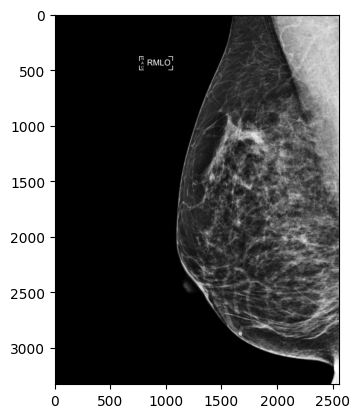

In [ ]:
dcmExample = pydicom.read_file(localPath)
array = dcmExample.pixel_array
fig = plt.imshow(array, 'gray')

## Visualizar varias Imagenes


In [ ]:
def show_images(subset):
    # Toma una lista de imagenes y las imprime en pantalla
    for grupo, examenes in subset.items():
        for acc_anon, list_dcm in examenes.items():
            for dcmpath in list_dcm:
                ds = pydicom.dcmread(dcmpath)
                array = ds.pixel_array
                plt.figure()
                plt.imshow(array, 'gray')
                plt.close()

# SandBox

Aqui haremos pruebas con un dataframes inventados que nos serviran para revisar que los comandos funcionen como queremos

## Buscar usuario

In [ ]:
# Buscar por empi_anon
Empi_anon = 10000879
finded = df_metadata_expanded.drop_duplicates(subset=['acc_anon'])
finded[finded['empi_anon']==Empi_anon].head(80)


,empi_anon,acc_anon,Manufacturer,ManufacturerModelName,anon_dicom_path,age_at_study,asses,tissueden,ETHNICITY_DESC
22737,10000879,6992096043050201,"HOLOGIC, Inc.",Selenia Dimensions,/mnt/NAS2/mammo/anon_dicom/cohort_1/10000879/1...,41.879026,N,3.0,Multiple


In [ ]:
Empi_anon = 27534527.0
finded = df_metadata_expanded.drop_duplicates(subset=['acc_anon'])
finded[finded['empi_anon']==Empi_anon].head(80)

,empi_anon,acc_anon,Manufacturer,ManufacturerModelName,age_at_study,asses,tissueden,ETHNICITY_DESC
2554,27534527,2102813370576244,"HOLOGIC, Inc.",Selenia Dimensions,71.911128,M,2.0,African American or Black


## Buscar por examen

In [ ]:
# Examen 1
Acc_anon = 3590933522614123
finded = df_metadata_expanded.drop_duplicates(subset=['acc_anon'])
finded[finded['acc_anon']==Acc_anon].head(80)

,empi_anon,acc_anon,Manufacturer,ManufacturerModelName,age_at_study,asses,tissueden,ETHNICITY_DESC
12154,67359791,3590933522614123,"HOLOGIC, Inc.",Selenia Dimensions,71.651026,N,3.0,Caucasian or White


In [ ]:
# Examen 2
Acc_anon = 3590933522614123
finded = df_metadata_expanded.drop_duplicates(subset=['acc_anon'])
finded[finded['acc_anon']==Acc_anon].head(80)

,empi_anon,acc_anon,Manufacturer,ManufacturerModelName,age_at_study,asses,tissueden,ETHNICITY_DESC
12154,67359791,3590933522614123,"HOLOGIC, Inc.",Selenia Dimensions,71.651026,N,3.0,Caucasian or White


## Crear dommies: clinical y Metadata

In [ ]:
print("Id examenes totales en clinical", df_clinical['acc_anon'].count())
print("Id examenes totales en metadata", df_metadata['acc_anon'].count())
print("Id examenes unicos en clinical", df_clinical['acc_anon'].nunique())
print("Id examenes unicos en metadata", df_metadata['acc_anon'].nunique())
print("Id pacientes unicos en clinical", df_clinical['empi_anon'].nunique())
print("Id pacientes unicos en metadata", df_clinical['acc_anon'].nunique())

Id examenes totales en clinical 81776
Id examenes totales en metadata 480323
Id examenes unicos en clinical 72770
Id examenes unicos en metadata 72770
Id pacientes unicos en clinical 23253
Id pacientes unicos en metadata 72770


In [ ]:
df_clinical_dommie = pd.DataFrame({
    'empi_anon': [90001, 90001, 90002, 90003, 90004,90004],
    'acc_anon': [6889815, 2770542, 1316512, 123153, 13854126,13854126],
    'age_at_study': [50, 51, 40, 30, 19, 19]
})
df_clinical_dommie.head(20)

,empi_anon,acc_anon,age_at_study
0,90001,6889815,50
1,90001,2770542,51
2,90002,1316512,40
3,90003,123153,30
4,90004,13854126,19
5,90004,13854126,19


In [ ]:
df_metadata_dommie = pd.DataFrame({
    'empi_anon': [90001, 90001, 90001, 90001, 90002, 90002, 90002, 90003, 90004],
    'acc_anon': [6889815, 6889815, 6889815, 2770542, 1316512, 1316512, 1316512, 123153,13854126],
    'Manufacturer': ['GE MEDICAL SYSTEMS','GE MEDICAL SYSTEMS','GE MEDICAL SYSTEMS','HOLOGIC, Inc.','HOLOGIC, Inc.','HOLOGIC, Inc.','HOLOGIC, Inc.','FUJIFILM Corporation','FUJIFILM Corporation']
})
df_metadata_dommie.head(20)

,empi_anon,acc_anon,Manufacturer
0,90001,6889815,GE MEDICAL SYSTEMS
1,90001,6889815,GE MEDICAL SYSTEMS
2,90001,6889815,GE MEDICAL SYSTEMS
3,90001,2770542,"HOLOGIC, Inc."
4,90002,1316512,"HOLOGIC, Inc."
5,90002,1316512,"HOLOGIC, Inc."
6,90002,1316512,"HOLOGIC, Inc."
7,90003,123153,FUJIFILM Corporation
8,90004,13854126,FUJIFILM Corporation


## Test de maniobras

Dommie

In [ ]:

df_metadata_expanded2 = pd.merge(df_metadata_dommie, df_clinical_dommie[['acc_anon', 'age_at_study']], on='acc_anon')
df_metadata_expanded2.head(20)

,empi_anon,acc_anon,Manufacturer,age_at_study
0,90001,6889815,GE MEDICAL SYSTEMS,50
1,90001,6889815,GE MEDICAL SYSTEMS,50
2,90001,6889815,GE MEDICAL SYSTEMS,50
3,90001,2770542,"HOLOGIC, Inc.",51
4,90002,1316512,"HOLOGIC, Inc.",40
5,90002,1316512,"HOLOGIC, Inc.",40
6,90002,1316512,"HOLOGIC, Inc.",40
7,90003,123153,FUJIFILM Corporation,30
8,90004,13854126,FUJIFILM Corporation,19
9,90004,13854126,FUJIFILM Corporation,19


In [ ]:
print("Expanded shape: ", df_metadata_expanded2.shape)
print("Metadata shape ",df_metadata_dommie.shape)

Expanded shape:  (10, 4)
Metadata shape  (9, 3)


Real

In [ ]:
df_clinical_unique = df_clinical.drop_duplicates(subset=['acc_anon'], keep='first')
df_metadata_expanded = pd.merge(df_metadata, df_clinical_unique[['acc_anon', 'age_at_study']], on='acc_anon')
df_metadata_expanded=df_metadata_expanded.sort_values(by=['empi_anon'])
df_metadata_expanded.head(30)

In [ ]:
df_metadata=df_metadata.sort_values(by=['empi_anon'])
df_metadata.head(30)

In [ ]:
print("Expanded shape: ", df_metadata_expanded.shape)
print("Metadata shape ",df_metadata.shape)

Expanded shape:  (480323, 5)
Metadata shape  (480323, 4)


## Buscar el modelo Lorad Perdido

In [ ]:
nuevo_df = df_metadata_expanded
sample_df = nuevo_df.loc[nuevo_df['Manufacturer'] == 'Lorad, A Hologic Company']
pd.options.display.max_columns = None
sample_df.head()

,empi_anon,acc_anon,Manufacturer,ManufacturerModelName,age_at_study,asses
403814,16992378,5771592968736770,"Lorad, A Hologic Company",DSM,50.111912,P
403815,16992378,5771592968736770,"Lorad, A Hologic Company",DSM,50.111912,P
403816,16992378,5771592968736770,"Lorad, A Hologic Company",DSM,50.111912,P


In [ ]:
empi_sample = 16992378
acc__sample = 5771592968736770
other_df = nuevo_df.loc[nuevo_df['empi_anon'] == 16992378]
other_df.head(1000)

,empi_anon,acc_anon,Manufacturer,ManufacturerModelName,age_at_study,asses
403803,16992378,4910595313855511,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,49.531476,A
403804,16992378,4910595313855511,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,49.531476,A
403805,16992378,4910595313855511,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,49.531476,A
403806,16992378,4910595313855511,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,49.531476,A
403807,16992378,8725032569501532,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,50.084533,S
403808,16992378,8725032569501532,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,50.084533,S
403809,16992378,8725032569501532,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,50.084533,S
403810,16992378,8725032569501532,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,50.084533,S
403811,16992378,8725032569501532,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,50.084533,S
403812,16992378,8725032569501532,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,50.084533,S


## Other way to cross tables

In [ ]:
Fabricante1 = 'GE MEDICAL SYSTEMS'
Fabricante2 = 'GE HEALTHCARE'
#Tabla con pacientes de GE
metadata_GE = df_metadata.loc[df_metadata['Manufacturer'] == Fabricante1]

# lista de identificadores con GE
Id_GE = metadata_GE['empi_anon'].values.tolist()

# Indexar pacientes en clinical con GE
clinical_GE = df_clinical.loc[df_clinical['empi_anon'].isin(Id_GE)]

## Descargar examen apartir de la informacion de la tabla
Tengo una tabla con su identificador y quiero poder descargar sus respectivo examen de la base de datos

In [ ]:
fullpaths=df_MK_GE['anon_dicom_path'].tolist()[0:3]
group = 'MK_GE'
localPath = '/content/sample_data'

In [ ]:
# Quitamos una parte del path que no esta en la estructura de AWS

serverpaths = []
for path in fullpaths:
  # Quitamos la parte de "/mnt/NAS2/mammo/anon_dicom/"" y agregamos la que "images/"
  cutpath = "images/"+path[27:]

  # Calculamos donde estan los "/" asi determinar donde este el 4to, apartir de ahi quitar
  # ... quedando como cutpath = images/cohort_1/67089718/67089718/1.2.840.113975.3.60.1.51312874.20150618.1112655/
  index = [n for n in range(len(cutpath)) if cutpath.find('/', n) == n]
  cutpath = cutpath[0:index[3]+1]
  serverpaths.append(cutpath)


In [ ]:
path

'/mnt/NAS2/mammo/anon_dicom/cohort_1/67089718/1.2.840.113975.3.60.1.51312874.20150618.1112655/1.2.841.113621.2.234.207919533135.16965150616124518.10010/1.2.826.0.1.3680043.8.498.48849543317421675723834576106853396592.dcm'

In [ ]:
df_MK_GE.head()

,empi_anon,acc_anon,Manufacturer,ManufacturerModelName,anon_dicom_path,age_at_study,asses,tissueden,ETHNICITY_DESC
2637,59567863,4169145865636417,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/59567863/1...,51.267309,M,4.0,African American or Black
45650,63456414,2939308266246184,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_1/63456414/1...,48.863426,M,2.0,African American or Black
62441,67089718,7818430406068104,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/67089718/1...,71.588055,M,3.0,Caucasian or White
75986,15941991,7027122798387630,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,/mnt/NAS2/mammo/anon_dicom/cohort_1/15941991/1...,53.572626,K,2.0,African American or Black
82479,21829886,9000955582871023,GE MEDICAL SYSTEMS,Senograph 2000D ADS_17.4.5,/mnt/NAS2/mammo/anon_dicom/cohort_1/21829886/1...,58.697988,M,3.0,Caucasian or White


### De una lista de examenes

In [ ]:
 df_MK_GE['acc_anon'].tolist()[0:1]

[4169145865636417]

In [ ]:
acc_anons

[4169145865636417, 2939308266246184, 7818430406068104]

In [ ]:
acc_anons = df_MK_GE['acc_anon'].tolist()[0:3]

for acc_anon, folder_path in zip(acc_anons, serverpaths):

  local_directory = '/content/sample_data/'+'/'+group+'/'+str(acc_anon)
  response = s3.list_objects_v2(Bucket='embed-dataset-open', Prefix=folder_path)
  for obj in response['Contents']:
      key = obj['Key']
      if not key.endswith('/'):
          file_name = os.path.relpath(key, folder_path)
          local_path = os.path.join(local_directory, file_name)
          os.makedirs(os.path.dirname(local_path), exist_ok=True)
          s3.download_file('embed-dataset-open', key, local_path)
          print(f"Archivo descargado: {file_name}")

Archivo descargado: 1.2.840.113623.2.234.207919533140.19878160112092720.10010/1.2.826.0.1.3680043.8.498.14866035546335769243183385680151146700.dcm
Archivo descargado: 1.2.840.113623.2.234.207919533140.19878160112092720.10010/1.2.826.0.1.3680043.8.498.27573652856790621618761249535757326999.dcm
Archivo descargado: 1.2.840.113623.2.234.207919533140.19878160112092720.10010/1.2.826.0.1.3680043.8.498.46272345554222877069623225532499066965.dcm
Archivo descargado: 1.2.840.113623.2.234.207919533140.19878160112092720.10010/1.2.826.0.1.3680043.8.498.49457348977274608033848842138110212076.dcm
Archivo descargado: 1.2.840.113623.2.234.207919533140.19878160112092720.10010/1.2.826.0.1.3680043.8.498.73257505031006712444123633169253348749.dcm
Archivo descargado: 1.2.840.113623.2.234.207919533140.19878160112092720.10010/1.2.826.0.1.3680043.8.498.97867899722327138258188265441395127588.dcm
Archivo descargado: 1.2.844.113627.2.75.2198562819.10733140512111409.10007/1.2.826.0.1.3680043.8.498.10307669391772021